In [ ]:
import os
import pickle
import string
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Use tf.keras for all Keras functionalities:
from tensorflow.keras.layers import concatenate, Input, Dense, LSTM, Embedding, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences #***
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input#***
from tensorflow.keras.preprocessing.image import img_to_array, load_img#***

# NLTK and PIL imports remain as is:
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from PIL import Image#**

# Magic command for inline plots:
%matplotlib inline


import json
from tensorflow.keras.preprocessing.text import tokenizer_from_json#***

In [ ]:
import sys
print(sys.version)


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
import nltk
print(nltk.__version__)


3.8.1


In [ ]:
import matplotlib
print(matplotlib.__version__)


3.7.1


In [ ]:
import tensorflow.keras
help(tensorflow.keras)


Help on package tensorflow.keras in tensorflow:

NAME
    tensorflow.keras - AUTOGENERATED. DO NOT EDIT.

PACKAGE CONTENTS
    __internal__ (package)
    activations (package)
    applications (package)
    backend (package)
    callbacks (package)
    constraints (package)
    datasets (package)
    dtensor (package)
    estimator (package)
    experimental (package)
    export (package)
    initializers (package)
    layers (package)
    losses (package)
    metrics (package)
    mixed_precision (package)
    models (package)
    optimizers (package)
    preprocessing (package)
    regularizers (package)
    saving (package)
    utils (package)

FILE
    /usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/__init__.py




In [ ]:

import keras
keras.__version__

'2.15.0'

In [ ]:
print(tokenizer_from_json.__module__.split('.')[0])  # Should give 'tensorflow.keras.preprocessing.text'

keras


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
def get_word_from_index(index, tokenizer):
    return next((word for word, idx in tokenizer.word_index.items() if idx == index), None)


def predict_caption(model, image_features, tokenizer, max_caption_length):
    # Initialize the caption sequence
    caption = 'startseq'

    # Generate the caption
    for _ in range(max_caption_length):
        # Convert the current caption to a sequence of token indices
        sequence = tokenizer.texts_to_sequences([caption])[0]
        # Pad the sequence to match the maximum caption length
        sequence = pad_sequences([sequence], maxlen=max_caption_length)
        # Predict the next word's probability distribution
        yhat = model.predict([image_features, sequence], verbose=0)
        # Get the index with the highest probability
        predicted_index = np.argmax(yhat)
        # Convert the index to a word
        predicted_word = get_word_from_index(predicted_index, tokenizer)

        # Append the predicted word to the caption
        caption += " " + predicted_word

        # Stop if the word is None or if the end sequence tag is encountered
        if predicted_word is None or predicted_word == 'endseq':
            break
    caption = caption.replace('startseq', '').replace('endseq', '').strip()
    return caption

In [ ]:
def extract_features(image_path):
    # Load the VGG model
    vgg_model = VGG16()

    # Create a model that outputs features from the second-to-last layer
    model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    img = preprocess_input(img)

    # Extract features
    feature = model.predict(img, verbose=0)

    return feature

In [ ]:
max_length=63

In [ ]:
# h5_file_path = '/content/drive/MyDrive/Colab Notebooks/SavedModels/final_model.h5'
# model = load_model(h5_file_path)
import pickle
from tensorflow.keras.models import load_model

# Load the model from the .pkl file
with open(r'/content/drive/MyDrive/Colab Notebooks/SavedModels/trained_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Save the model in .h5 format
model.save(r'/content/drive/MyDrive/Colab Notebooks/SavedModels/trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
'''file_path = '/content/drive/MyDrive/trained_model.pkl'  # Adjust the path as needed
with open(file_path, 'rb') as f:
    model = pickle.load(f)''' # done edit this path

In [ ]:
file_path = '/content/drive/MyDrive/tokenizer.json'  # Adjust the path as needed

# Load the tokenizer from the JSON file in Google Drive
with open(file_path, 'r') as f:
    tokenizer_json = json.load(f)
    tokenizer = tokenizer_from_json(tokenizer_json)

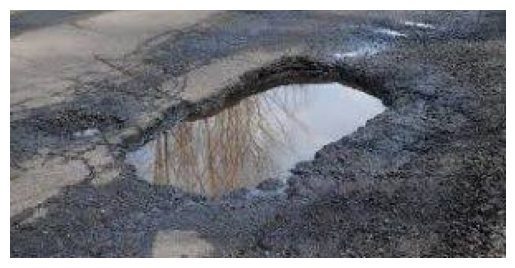

In [ ]:
feature=extract_features(r"/content/pot.jpg")
img = Image.open(r"/content/pot.jpg")
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
 predicted_caption = predict_caption(model, feature, tokenizer, max_length)
 print(predicted_caption)

road is in shambles and its affecting everyone


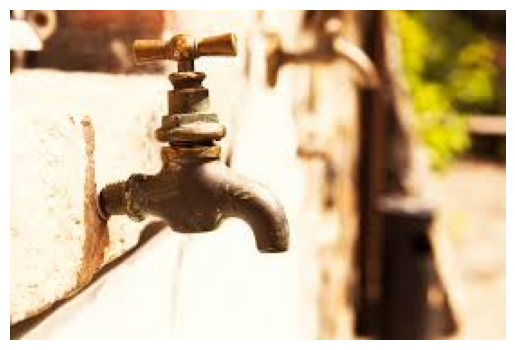

In [ ]:
feature=extract_features(r"/content/tap.jpg")
img = Image.open(r"/content/tap.jpg")

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
predicted_caption = predict_caption(model, feature, tokenizer, max_length)
print(predicted_caption)

taps running dry we need water


In [ ]:
feature=extract_features(r"/content/waterleak1.jpg")
img = Image.open(r"/content/waterleak1.jpg")

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
predicted_caption = predict_caption(model, feature, tokenizer, max_length)
print(predicted_caption)

In [ ]:
feature=extract_features(r"/content/candle.jpg")
img = Image.open(r"/content/candle.jpg")

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
predicted_caption = predict_caption(model, feature, tokenizer, max_length)
print(predicted_caption)